# 数据分析

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
from sqlalchemy import create_engine
import cx_Oracle as oracle

import os 
os.environ['NLS_LANG'] = 'SIMPLIFIED CHINESE_CHINA.UTF8' 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
conn = oracle.connect('NNSCUSER','NNSCUSER','192.168.1.171/orcl')

In [4]:
tb_20 = pd.read_sql('select * from MT_DC_PM_MP_GD102DATA_CUR', conn)
tb_22 = pd.read_sql('select * from MT_DC_PM_MP_PT102DATA_CUR', conn)
tb_46 = pd.read_sql('select * from TEST_DATA', conn)
tb_47 = pd.read_sql('select * from TEST_MAIN', conn)

## 表20

In [5]:
tb_20_new = tb_20[['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'INTERNALSTOPTIME',
                  'RUNTIME', 'PRODUCETIME', 'WAITINGMATERIALTIME', 'MAXRUNTIME', 'AVGRUNTIME', 'THEORETICALPRODUCTION',
                  'REALPRODUCTION', 'REJECTPRODUCTION', 'STOPCNT', 'NORMALSPEED']]
tb_20_new.head()

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,INTERNALSTOPTIME,RUNTIME,PRODUCETIME,WAITINGMATERIALTIME,MAXRUNTIME,AVGRUNTIME,THEORETICALPRODUCTION,REALPRODUCTION,REJECTPRODUCTION,STOPCNT,NORMALSPEED
0,2015-11-11,3,202,10001586,1568,24467,22155,2312,3698,1112,158153,126910,180,21,400
1,2015-11-11,3,202,10001586,3832,22203,22203,0,1807,274,164888,126932,1094,80,380
2,2015-11-11,3,215,10001586,2094,23941,20477,3464,2419,920,150473,124130,120,25,400
3,2015-11-11,3,215,10001586,5632,20403,20403,0,965,78,164888,123815,977,258,380
4,2015-11-11,3,220,10001586,3969,22066,20322,1744,2609,649,161940,113730,190,33,400


In [6]:
tb_20_new.groupby('PB_SHIFT_ID').sum().drop(['PB_PRODUCT_ID', 'NORMALSPEED'], axis=1)

,INTERNALSTOPTIME,RUNTIME,PRODUCETIME,WAITINGMATERIALTIME,MAXRUNTIME,AVGRUNTIME,THEORETICALPRODUCTION,REALPRODUCTION,REJECTPRODUCTION,STOPCNT
PB_SHIFT_ID,,,,,,,,,,
1,119715782,321884240,297781391,24110049,63677661,30620360,2715081835,1584968436,9282871,1108701
2,85272367,329508461,305630624,23877837,60497271,30678837,2537878325,1661985044,8903902,1072832
3,64486227,267721881,248671558,19050323,50816045,26457385,2035556885,1347488443,7095326,860927


In [7]:
tb_20_new.groupby(['PB_SHIFT_ID', 'PM_MP_MACHINE_ID']).sum().drop(['PB_PRODUCT_ID', 'NORMALSPEED'], axis=1)

INTERNALSTOPTIME   RUNTIME  PRODUCETIME  \
PB_SHIFT_ID PM_MP_MACHINE_ID                                            
1           201                        7967670  16636591     15671492   
            202                        6945043  18021458     16880736   
            203                        6588105  18546613     17302566   
            204                        6632830  18550362     17084932   
            205                        5775149  17041038     15789098   
            206                        5443406  11275055     10401279   
            207                        6765606  19805873     18227978   
            208                        6740713  18904454     17737239   
            209                        7270709  19493155     18178499   
            210                        3391255  16765672     13725477   
            212                        3009054   9184155      8604589   
            213                        4884111   9686713      8864382   
            214                        5864401  15140555     14156684   
            215                        6822548  17862365     16659198   
            216                        6851676  14950757     14073879   
            217                        5789053  16390994     15316221   
            218                        2779845  13156971     12759721   
            219                        7055079  17629158     16589143   
            220                        7541327  15224308     14192373   
            221                        2313520   2172707      1977626   
            222                        1919648   6633129      6361799   
            223                         691455   7222938      5753730   
            224                         673579   1589219      1472750   
2           201                        6084743  17586460     16664998   
            202                        5047425  18801141     17672351   
            203                        4725887  19268695     18011940   
            204                        4906052  18629765     17128890   
            205                        4310080  17832454     16596051   
            206                        4131704  11778424     10941203   
            207                        4687170  20238674     18689021   
...                                        ...       ...          ...   
            218                        1844157  12849533     12445479   
            219                        5018723  18579867     17521595   
            220                        5431136  15967676     14907105   
            221                        1849775   2590236      2388434   
            222                        1799720   5164540      4885227   
            223                         491711   7034382      5615605   
            224                         499929   1205710      1083134   
3           201                        4470084  14185795     13487328   
            202                        3559979  15526942     14699242   
            203                        3464986  15611224     14598141   
            204                        3929054  15308974     14258566   
            205                        3215254  14183203     13237978   
            206                        3294786   9582272      8879866   
            207                        3505739  16381235     15082177   
            208                        3345686  15926843     15089460   
            209                        3751870  16144115     15177567   
            210                        1774560  14219186     11443429   
            212                        1245607   6766427      6397745   
            213                        3205678   8584023      7894219   
            214                        2994538  12982736     12185145   
            215                        3531263  14817934     13939903   
            216                        3488445  11229053     10421852   
            217

In [8]:
tb_20_new.groupby(['PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID']).sum().drop('NORMALSPEED', axis=1)

INTERNALSTOPTIME   RUNTIME  \
PB_SHIFT_ID PM_MP_MACHINE_ID PB_PRODUCT_ID                               
1           201              10001586                7967670  16636591   
            202              10001586                6945043  18021458   
            203              10001586                6588105  18546613   
            204              10001586                6632830  18550362   
            205              10001586                5775149  17041038   
            206              10001586                5443406  11275055   
            207              10001586                6765606  19805873   
            208              10001586                6740713  18904454   
            209              10001586                7270709  19493155   
            210              10001586                3391255  16765672   
            212              10001586                3009054   9184155   
            213              80                      4856300   9587174   
                             10001586                  27811     99539   
            214              10001586                5864401  15140555   
            215              10001586                6822548  17862365   
            216              10001586                6851676  14950757   
            217              10001586                5789053  16390994   
            218              10001586                2779845  13156971   
            219              10001586                7055079  17629158   
            220              10001586                7541327  15224308   
            221              10001586                2313520   2172707   
            222              10001586                1919648   6633129   
            223              10001586                 691455   7222938   
            224              10001586                 673579   1589219   
2           201              10001586                6084743  17586460   
            202              10001586                5047425  18801141   
            203              10001586                4725887  19268695   
            204              10001586                4906052  18629765   
            205              10001586                4310080  17832454   
            206              10001586                4131704  11778424   
...                                                      ...       ...   
            219              10001586                5018723  18579867   
            220              10001586                5431136  15967676   
            221              10001586                1849775   2590236   
            222              10001586                1799720   5164540   
            223              10001586                 491711   7034382   
            224              10001586                 499929   1205710   
3           201              10001586                4470084  14185795   
            202              10001586                3559979  15526942   
            203              10001586                3464986  15611224   
            204              10001586                3929054  15308974   
            205              10001586                3215254  14183203   
            206              10001586                3294786   9582272   
            207              10001586                3505739  16381235   
            208              10001586                3345686  15926843   
            209              10001586                3751870  16144115   
            210              10001586                1774560  14219186   
            212              10001586                1245607   6766427   
            213              80                      3196931   8489552   
                             10001586                   8747     94471   
            214              10001586                2994538  12982736   
            215              10001586                3531263  14817934   
            216              10001586           

In [9]:
tb_20_gb = tb_20_new.groupby(['PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID']).sum().drop('NORMALSPEED', axis=1)

columns = ['INTERNALSTOPTIME', 'RUNTIME', 'PRODUCETIME', 'WAITINGMATERIALTIME', 'MAXRUNTIME', 
           'AVGRUNTIME', 'THEORETICALPRODUCTION', 'REALPRODUCTION', 'REJECTPRODUCTION', 
           'STOPCNT']

for c in columns:
    print('*' * 60)
    print('由小到大前十：')
    print(tb_20_gb[[c]].sort_values(c).head(10))
    print('由小到大后十：')
    print(tb_20_gb[[c]].sort_values(c).tail(10))

************************************************************
由小到大前十：
                                            INTERNALSTOPTIME
PB_SHIFT_ID PM_MP_MACHINE_ID PB_PRODUCT_ID                  
3           213              10001586                   8747
2           213              10001586                  18562
1           213              10001586                  27811
3           223              10001586                 393544
2           223              10001586                 491711
            224              10001586                 499929
1           224              10001586                 673579
            223              10001586                 691455
3           224              10001586                 830697
            218              10001586                 973577
由小到大后十：
                                            INTERNALSTOPTIME
PB_SHIFT_ID PM_MP_MACHINE_ID PB_PRODUCT_ID                  
1           204              10001586                6632830
        

In [10]:
tb_20_new.describe()

,PB_SHIFT_ID,PB_PRODUCT_ID,INTERNALSTOPTIME,RUNTIME,PRODUCETIME,WAITINGMATERIALTIME,MAXRUNTIME,AVGRUNTIME,THEORETICALPRODUCTION,REALPRODUCTION,REJECTPRODUCTION,STOPCNT,NORMALSPEED
count,49939.000000,4.993900e+04,49939.000000,49939.000000,49939.000000,49939.000000,49939.000000,49939.000000,4.993900e+04,49939.000000,49939.000000,49939.000000,49939.0000
mean,1.935181,9.663523e+06,5396.070726,18404.745429,17062.487695,1342.401910,3504.094535,1757.275516,1.459484e+05,92001.079777,506.259617,60.923527,389.9998
std,0.815677,1.807462e+06,6821.613849,11097.963199,10770.830878,2753.819896,8128.123959,5662.448013,8.273825e+04,56122.385853,3918.965302,64.167066,10.0001
min,1.000000,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,380.0000
25%,1.000000,1.000159e+07,1761.000000,15569.000000,12752.500000,0.000000,1044.000000,120.000000,1.559095e+05,40593.000000,1.000000,11.000000,380.0000
50%,2.000000,1.000159e+07,4101.000000,22409.000000,21000.000000,0.000000,1775.000000,230.000000,1.723330e+05,115680.000000,200.000000,29.000000,380.0000
75%,3.000000,1.000159e+07,6779.000000,24752.000000,23237.000000,2173.000000,2925.000000,923.000000,1.798850e+05,136580.500000,450.000000,115.000000,400.0000
max,3.000000,1.000159e+07,322123.000000,359632.000000,359958.000000,30771.000000,359486.000000,117316.000000,4.050453e+06,199694.000000,112573.000000,433.000000,400.0000


In [11]:
tb_20_clear = tb_20_new.query('INTERNALSTOPTIME < 50000 & RUNTIME < 50000 & PRODUCETIME < 50000 & THEORETICALPRODUCTION < 500000 & REJECTPRODUCTION < 20000')

In [12]:
tb_20_clear.describe()

,PB_SHIFT_ID,PB_PRODUCT_ID,INTERNALSTOPTIME,RUNTIME,PRODUCETIME,WAITINGMATERIALTIME,MAXRUNTIME,AVGRUNTIME,THEORETICALPRODUCTION,REALPRODUCTION,REJECTPRODUCTION,STOPCNT,NORMALSPEED
count,49806.000000,4.980600e+04,49806.000000,49806.000000,49806.000000,49806.000000,49806.000000,49806.000000,49806.000000,49806.000000,49806.000000,49806.000000,49806.000000
mean,1.935470,9.662620e+06,5345.535277,18260.239810,16921.006365,1339.233446,3328.627635,1704.642553,144566.691242,92195.596093,346.214010,61.045296,390.017267
std,0.815626,1.809790e+06,5666.294488,9528.303532,9133.726269,2734.906956,5648.175788,5518.842458,64440.467625,56038.145825,467.849943,64.182733,10.000085
min,1.000000,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,380.000000
25%,1.000000,1.000159e+07,1772.000000,15545.250000,12739.500000,0.000000,1043.000000,119.000000,155860.750000,41670.000000,1.000000,11.000000,380.000000
50%,2.000000,1.000159e+07,4109.000000,22399.000000,20990.000000,0.000000,1767.000000,229.000000,172306.000000,115810.000000,200.000000,29.000000,400.000000
75%,3.000000,1.000159e+07,6780.000000,24738.000000,23225.000000,2174.000000,2912.000000,919.000000,179885.000000,136610.000000,450.000000,116.000000,400.000000
max,3.000000,1.000159e+07,30777.000000,34136.000000,30997.000000,30771.000000,30997.000000,30997.000000,261554.000000,199694.000000,13459.000000,433.000000,400.000000


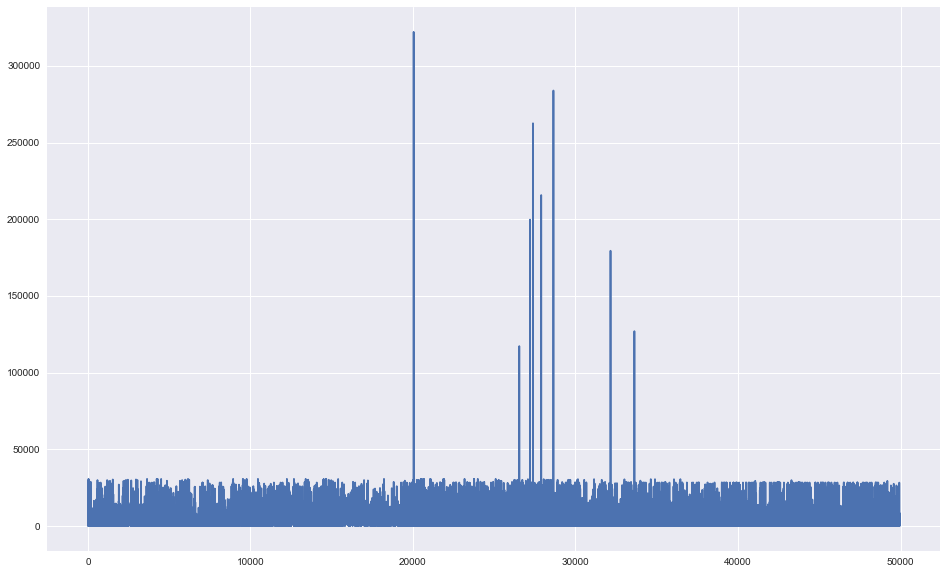

In [13]:
plt.figure(figsize=(16, 10))
plt.plot(tb_20_new.loc[:, 'INTERNALSTOPTIME'])
plt.show()

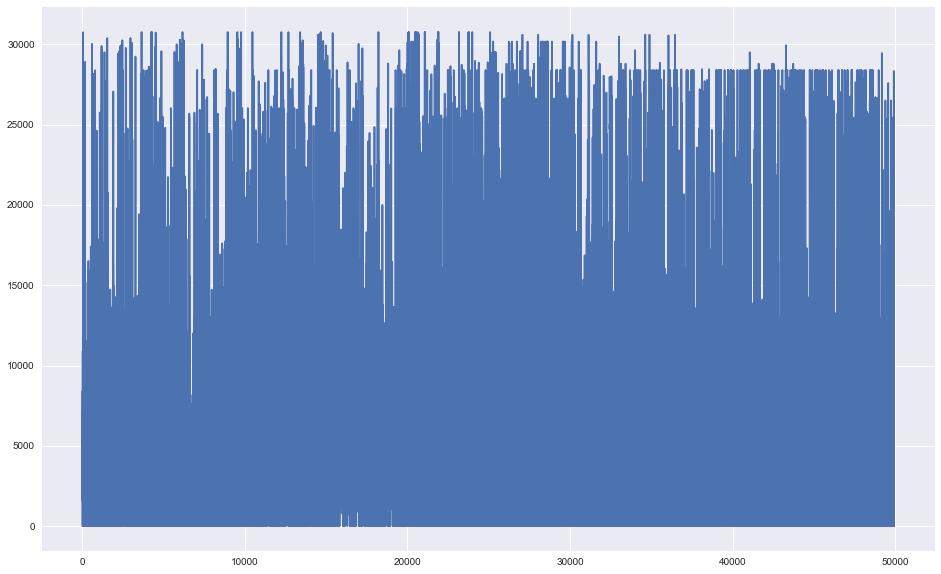

In [14]:
plt.figure(figsize=(16, 10))
plt.plot(tb_20_clear.loc[:, 'INTERNALSTOPTIME'])
plt.show()

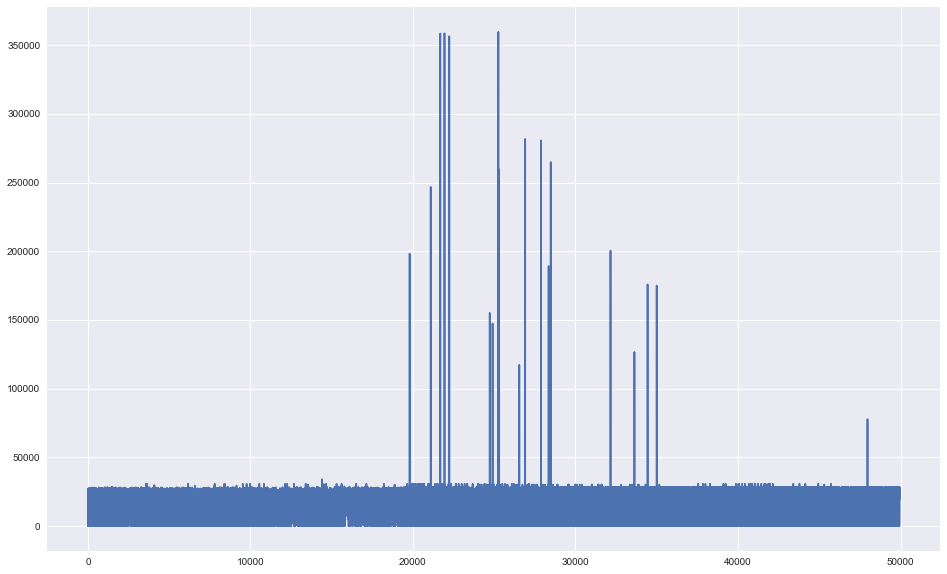

In [15]:
plt.figure(figsize=(16, 10))
plt.plot(tb_20_new.loc[:, 'RUNTIME'])
plt.show()

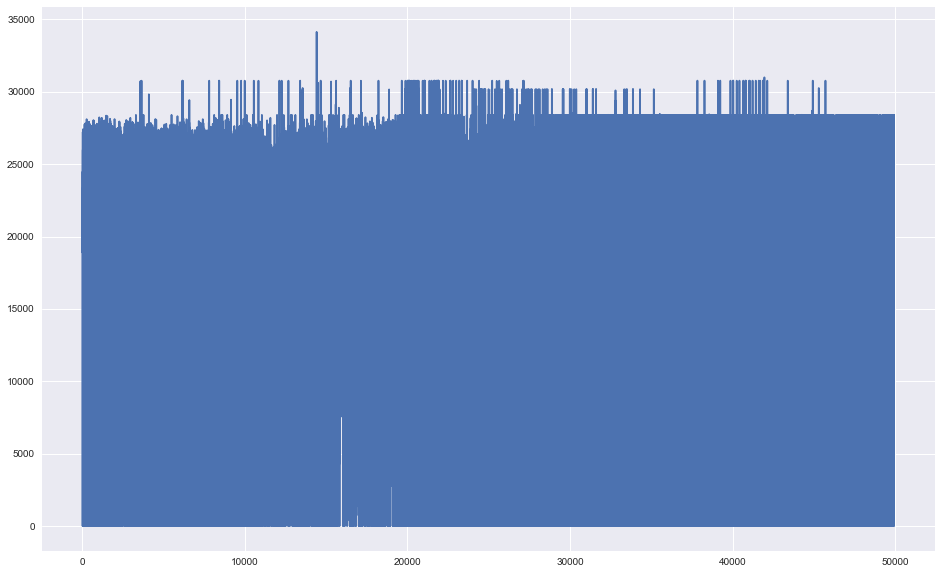

In [16]:
plt.figure(figsize=(16, 10))
plt.plot(tb_20_clear.loc[:, 'RUNTIME'])
plt.show()

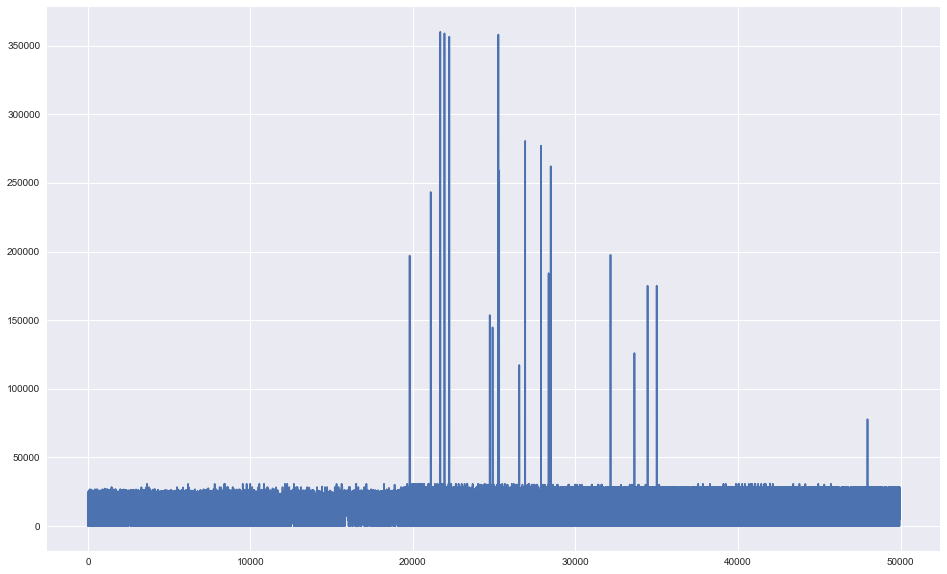

In [17]:
plt.figure(figsize=(16, 10))
plt.plot(tb_20_new.loc[:, 'PRODUCETIME'])
plt.show()

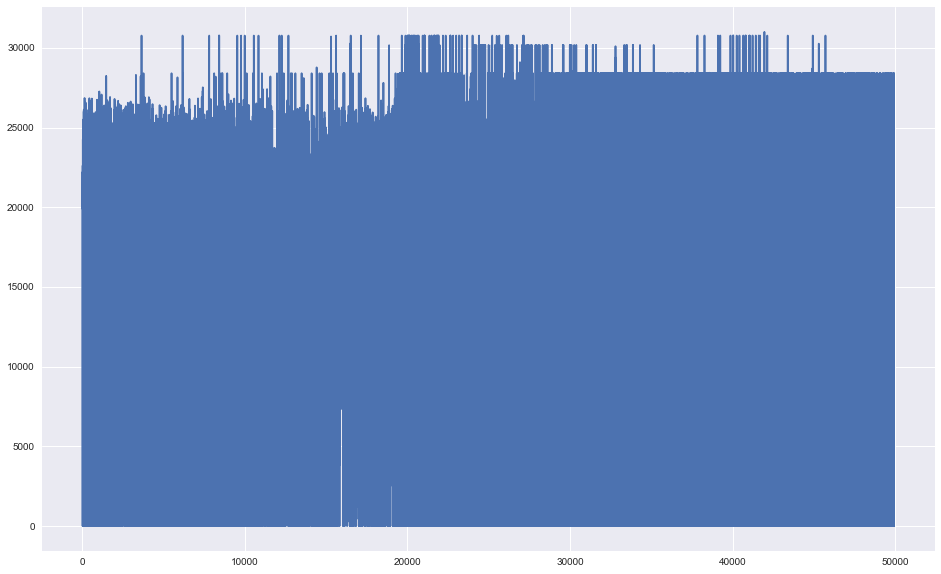

In [18]:
plt.figure(figsize=(16, 10))
plt.plot(tb_20_clear.loc[:, 'PRODUCETIME'])
plt.show()

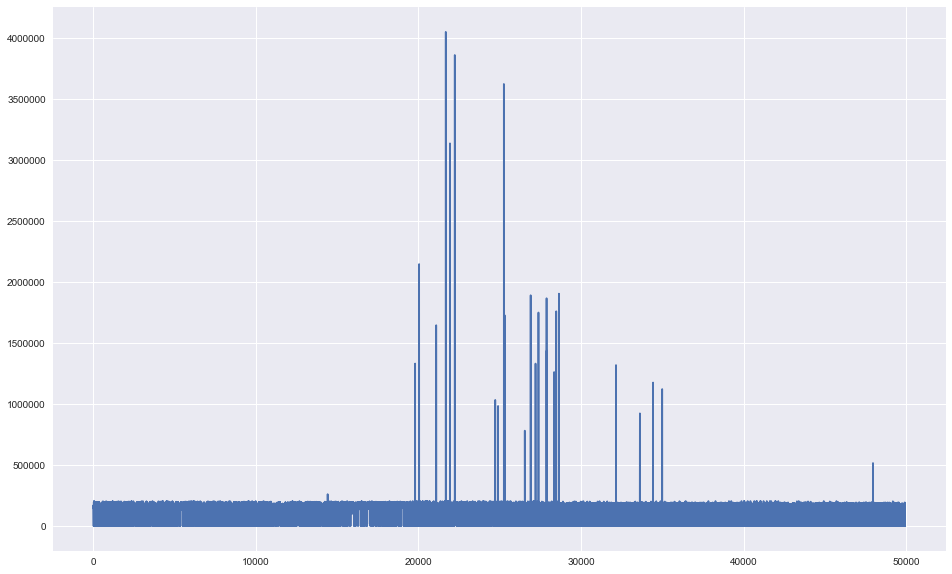

In [19]:
plt.figure(figsize=(16, 10))
plt.plot(tb_20_new.loc[:, 'THEORETICALPRODUCTION'])
plt.show()

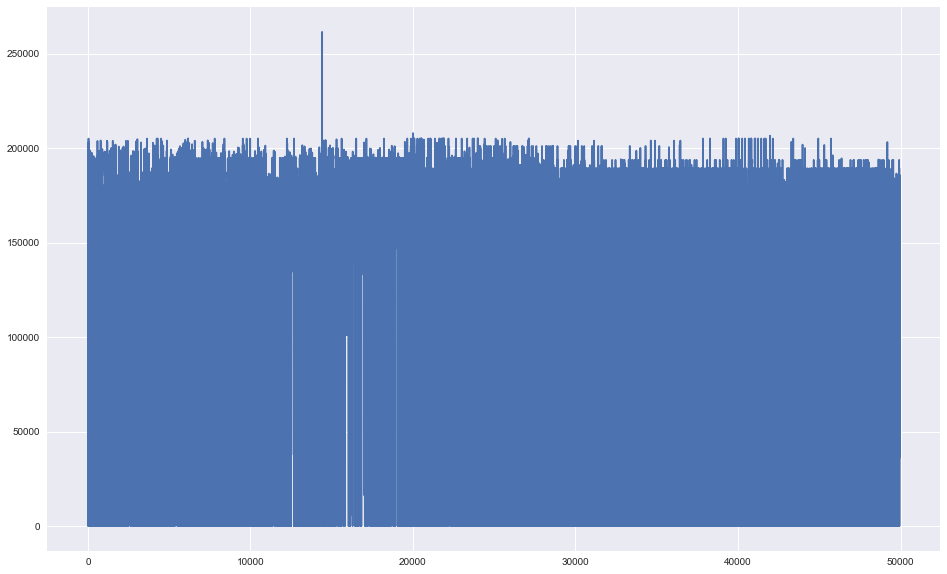

In [20]:
plt.figure(figsize=(16, 10))
plt.plot(tb_20_clear.loc[:, 'THEORETICALPRODUCTION'])
plt.show()

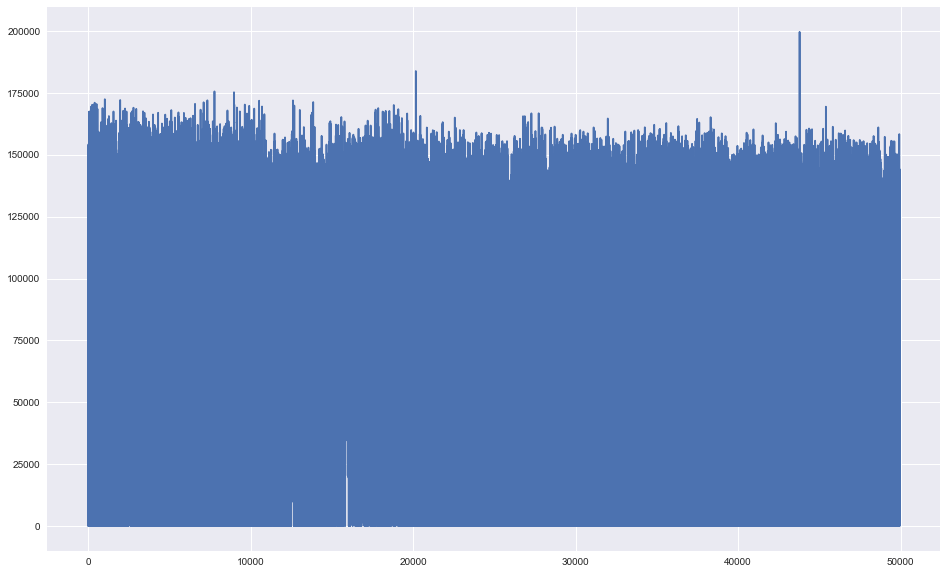

In [21]:
plt.figure(figsize=(16, 10))
plt.plot(tb_20_new.loc[:, 'REALPRODUCTION'])
plt.show()

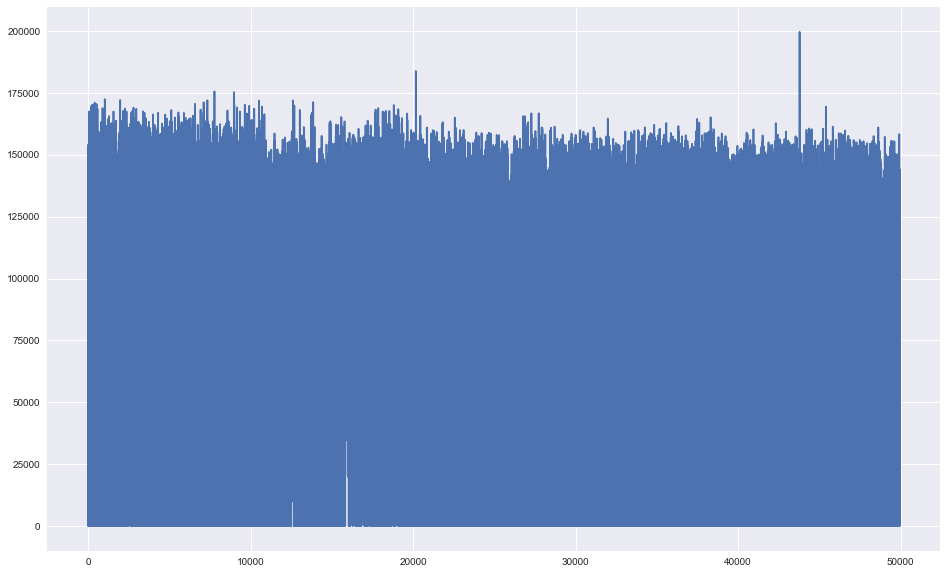

In [22]:
plt.figure(figsize=(16, 10))
plt.plot(tb_20_clear.loc[:, 'REALPRODUCTION'])
plt.show()

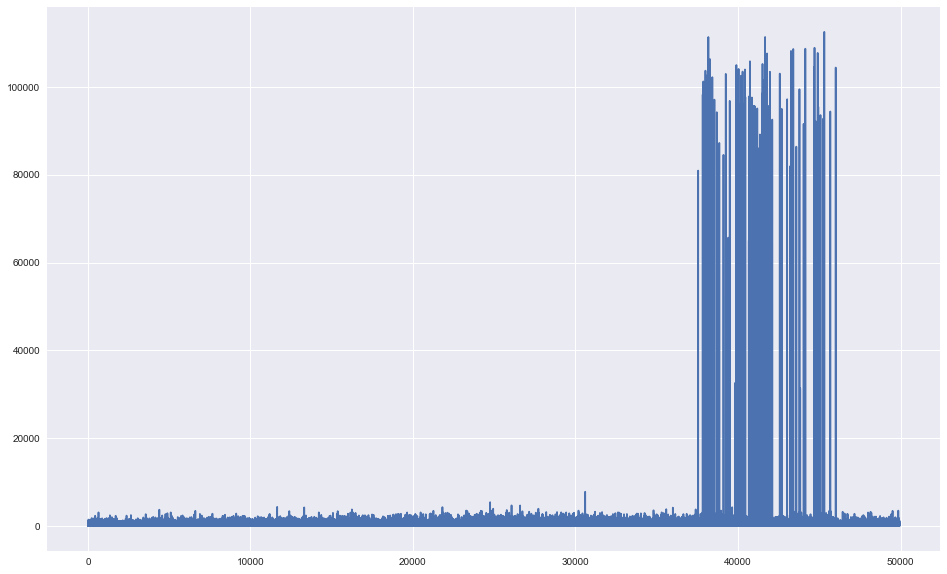

In [23]:
plt.figure(figsize=(16, 10))
plt.plot(tb_20_new.loc[:, 'REJECTPRODUCTION'])
plt.show()

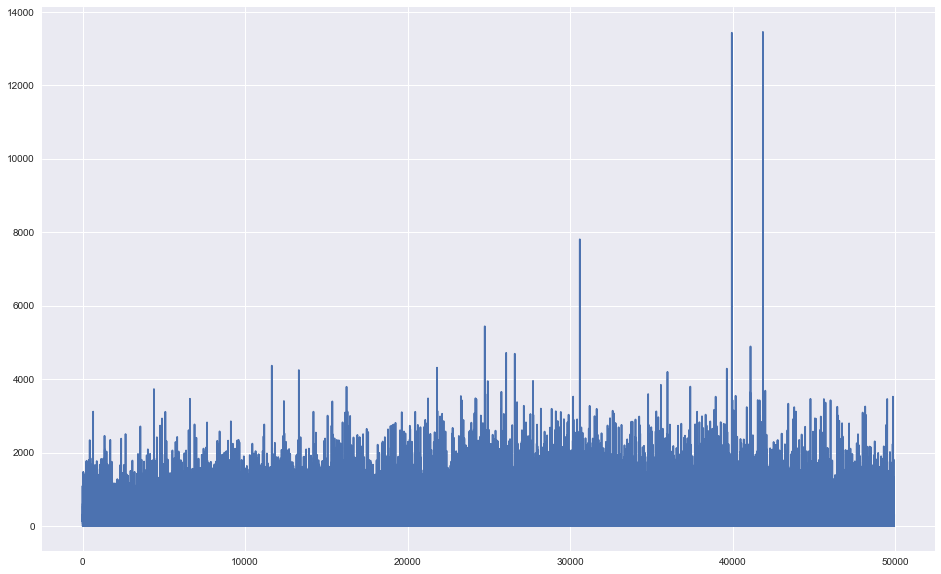

In [24]:
plt.figure(figsize=(16, 10))
plt.plot(tb_20_clear.loc[:, 'REJECTPRODUCTION'])
plt.show()

## 表22

In [25]:
tb_22_new = tb_22[['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'FILTERTIP',
                  'TOTALWASTE', 'TOTALWASTEPCT', 'MACHINESPEED', 'RUNTIME', 'TOTALSTOPTIME', 'TOTALSTOPCNT']]
tb_22_new.head()

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
0,2015-11-13,1,115,10001586,742,2377,0.09,7196,28980,2160,34
1,2015-11-13,1,102,10001586,680,5643,0.19,7246,27720,3420,37
2,2015-11-13,1,113,10001586,813,16812,0.59,7269,29700,1440,22
3,2015-11-13,1,101,10001586,784,26052,0.86,0,28980,2160,12
4,2015-11-13,1,119,10001586,0,1574,0.43,6738,2880,28260,26


In [26]:
tb_22_new.groupby('PB_SHIFT_ID').sum().drop(['PB_PRODUCT_ID', 'MACHINESPEED'], axis=1)

,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
PB_SHIFT_ID,,,,,,
1,2647867693,101251998,13118.94,148548781,92235004,265778
2,2734817800,91577363,5555.80,162267236,58393665,231575
3,2391375088,-732460743,5955.81,111109237,-806449603,194961


In [27]:
tb_22_new.groupby(['PB_SHIFT_ID', 'PM_MP_MACHINE_ID']).sum().drop(['PB_PRODUCT_ID', 'MACHINESPEED'], axis=1)

FILTERTIP  TOTALWASTE  TOTALWASTEPCT   RUNTIME  \
PB_SHIFT_ID PM_MP_MACHINE_ID                                                   
1           101                98984115    12923794        1696.14  10351860   
            102               120462820     3155341        5451.97   8962572   
            103               168460766     2134334         161.62   8802780   
            104               161105895    26144080        1186.39   9080460   
            105               127878408     2836655         167.61   7803600   
            106               137832046     5854184         597.52   7745160   
            107               190040826     4819803         372.64   9678660   
            108               206519492     4424956         298.84  11396100   
            109               197915647     4874599         334.75  10602540   
            110               135423003     3213996         176.19   8370600   
            111                     626       83424          16.05     14854   
            112                47912783     2125466         123.65   5071860   
            113                70685860     3223076         210.79   6890668   
            114               162168521     2204772         122.48   3985428   
            115                98622556     3641255         264.70   4439556   
            116                91764979     2329151         266.07   5847023   
            117               177696664     4254756         283.74   4781640   
            118               120548577     3639036         334.29   2818380   
            119               152477741     3111995         197.15   8067960   
            120                96325115     2364305         232.97   6639480   
            121                 2243712     1002928         315.09   1041300   
            122                 8811085     1683879         203.06   3757620   
            123                73986456     1206213         105.23   2398680   
            124                       0           0           0.00         0   
2           101               101571844     8111586         833.61  10706280   
            102               128060289     2766068         656.13   8547900   
            103               173277774     2259531         141.50   9642720   
            104               163667257    22163671         995.25   8938500   
            105               133037547     2744540         139.93   9808680   
            106               145590686     5242714         361.22   7247460   
...                                 ...         ...            ...       ...   
            119               161591638     3099477         145.18   9377280   
            120                93372056     2029862         119.74   8031360   
            121                 1257551      871967         205.59   1652520   
            122                 7758502     1582120         109.93   3983280   
            123                75633309     1198568          82.02   2996640   
            124                       0           0           0.00         0   
3           101                69673408     7313753         701.96   7850040   
            102               120426920     2479556        1318.83   7813620   
            103               150815286     1785974          98.03   7336080   
            104               142750385    18803790         916.63   6557400   
            105               123761995     2272391         142.33   6937380   
            106               132472902     3955779         442.78   6092460   
            107               161110878     3505896         248.72   7934040   
            108               183733674     3276705         135.45   8580000   
            109               165574223     4056925         173.75   8607900   
            110               132917797  -805767640         134.48 -10218587   
            111                       0           0          12.80         0   
            112               

In [28]:
tb_22_new.groupby(['PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID']).sum().drop('MACHINESPEED', axis=1)

FILTERTIP  TOTALWASTE  \
PB_SHIFT_ID PM_MP_MACHINE_ID PB_PRODUCT_ID                          
1           101              10001586        98984115    12923794   
            102              10001586       120462820     3155341   
            103              10001586       168460766     2134334   
            104              10001586       161105895    26144080   
            105              10001586       127878408     2836655   
            106              10001586       137832046     5854184   
            107              10001586       190040826     4819803   
            108              10001586       206519492     4424956   
            109              10001586       197915647     4874599   
            110              10001586       135423003     3213996   
            111              0                    626       83424   
            112              80                     0           0   
                             10001586        47912783     2125466   
            113              10001586        70685860     3223076   
            114              10001586       162168521     2204772   
            115              10001586        98622556     3641255   
            116              10001586        91764979     2329151   
            117              10001586       177696664     4254756   
            118              10001586       120548577     3639036   
            119              10001586       152477741     3111995   
            120              10001586        96325115     2364305   
            121              10001586         2243712     1002928   
            122              10001586         8811085     1683879   
            123              10001586        73986456     1206213   
            124              10001586               0           0   
2           101              10001586       101571844     8111586   
            102              10001586       128060289     2766068   
            103              10001586       173277774     2259531   
            104              10001586       163667257    22163671   
            105              10001586       133037547     2744540   
...                                               ...         ...   
            119              10001586       161591638     3099477   
            120              10001586        93372056     2029862   
            121              10001586         1257551      871967   
            122              10001586         7758502     1582120   
            123              10001586        75633309     1198568   
            124              10001586               0           0   
3           101              10001586        69673408     7313753   
            102              10001586       120426920     2479556   
            103              10001586       150815286     1785974   
            104              10001586       142750385    18803790   
            105              10001586       123761995     2272391   
            106              10001586       132472902     3955779   
            107              10001586       161110878     3505896   
            108              10001586       183733674     3276705   
            109              10001586       165574223     4056925   
            110              10001586       132917797  -805767640   
            111              0                      0           0   
            112              10001586        43870514     1751938   
            113              10001586        59720914     2719488   
            114              10001586       141615270     1827316   
            115              10001586        92576464     3030765   
            116              10001586        92618821     2097208   
            117              10001586       168440211     3894445   
            118              10001586       110795277     2692500   
            119              10001586       145371405     2663464   
            120              10001586     

In [29]:
tb_22_gb = tb_22_new.groupby(['PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID']).sum().drop('MACHINESPEED', axis=1)

columns = ['FILTERTIP', 'TOTALWASTE', 'TOTALWASTEPCT', 'RUNTIME', 'TOTALSTOPTIME', 
           'TOTALSTOPCNT']

for c in columns:
    print('*' * 60)
    print('由小到大前十：')
    print(tb_22_gb[[c]].sort_values(c).head(10))
    print('由小到大后十：')
    print(tb_22_gb[[c]].sort_values(c).tail(10))

************************************************************
由小到大前十：
                                            FILTERTIP
PB_SHIFT_ID PM_MP_MACHINE_ID PB_PRODUCT_ID           
2           112              80                     0
3           111              0                      0
2           124              10001586               0
1           124              10001586               0
            112              80                     0
3           124              10001586               0
1           111              0                    626
2           111              0                    808
3           121              10001586          991723
2           121              10001586         1257551
由小到大后十：
                                            FILTERTIP
PB_SHIFT_ID PM_MP_MACHINE_ID PB_PRODUCT_ID           
2           103              10001586       173277774
1           117              10001586       177696664
3           108              10001586       183733674
2    

In [30]:
tb_22_new.describe()

,PB_SHIFT_ID,PB_PRODUCT_ID,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
count,27216.000000,2.721600e+04,2.721600e+04,2.721600e+04,27216.000000,27216.000000,2.721600e+04,2.721600e+04,27216.000000
mean,1.923464,9.974759e+06,2.856430e+05,-1.982773e+04,0.905003,1559.283620,1.550284e+04,-2.409689e+04,25.437757
std,0.815872,5.173004e+05,3.096492e+05,4.901820e+06,5.446357,2855.060325,1.087346e+05,5.207393e+06,16.849040
min,1.000000,0.000000e+00,0.000000e+00,-8.085829e+08,0.000000,0.000000,-1.708733e+07,-8.590543e+08,0.000000
25%,1.000000,1.000159e+07,4.247500e+02,3.262000e+03,0.180000,0.000000,1.140000e+04,2.820000e+03,15.000000
50%,2.000000,1.000159e+07,6.320700e+04,6.487000e+03,0.320000,0.000000,2.118000e+04,4.800000e+03,23.000000
75%,3.000000,1.000159e+07,6.190392e+05,1.064900e+04,0.510000,7.000000,2.412000e+04,7.800000e+03,34.000000
max,3.000000,1.000159e+07,3.470277e+06,2.318017e+06,100.000000,23241.000000,2.248200e+05,3.560400e+06,218.000000


In [31]:
tb_22_clear = tb_22_new.query('FILTERTIP < 1500000 & TOTALWASTE > 0 & RUNTIME > 0 & TOTALSTOPTIME > 0')

In [32]:
tb_22_clear.describe()

,PB_SHIFT_ID,PB_PRODUCT_ID,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
count,23772.000000,2.377200e+04,2.377200e+04,2.377200e+04,23772.000000,23772.000000,23772.000000,23772.000000,23772.000000
mean,1.938583,1.000074e+07,3.228524e+05,1.081891e+04,0.823090,1656.429707,19735.751725,6358.328790,27.852095
std,0.808289,9.173644e+04,3.105940e+05,7.074115e+04,4.499817,2907.035328,7258.688383,5004.975674,15.883828
min,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,47.000000,60.000000,0.000000
25%,1.000000,1.000159e+07,5.870000e+02,4.011750e+03,0.210000,0.000000,17100.000000,3240.000000,17.000000
50%,2.000000,1.000159e+07,3.274605e+05,7.033500e+03,0.340000,0.000000,22080.000000,4980.000000,25.000000
75%,3.000000,1.000159e+07,6.403938e+05,1.100325e+04,0.520000,992.000000,24480.000000,7620.000000,35.000000
max,3.000000,1.000159e+07,1.377188e+06,2.318017e+06,100.000000,23241.000000,224820.000000,38760.000000,218.000000


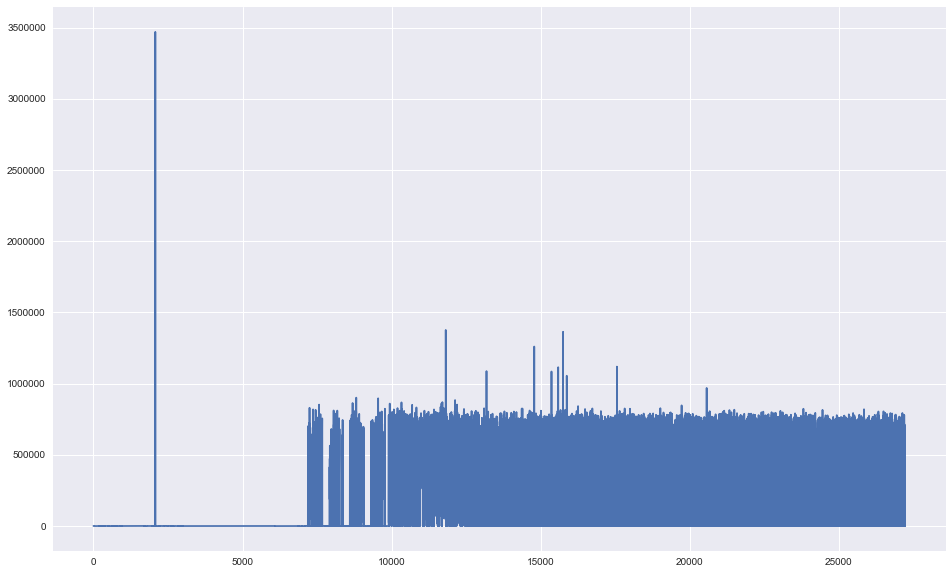

In [33]:
plt.figure(figsize=(16, 10))
plt.plot(tb_22_new.loc[:, 'FILTERTIP'])
plt.show()

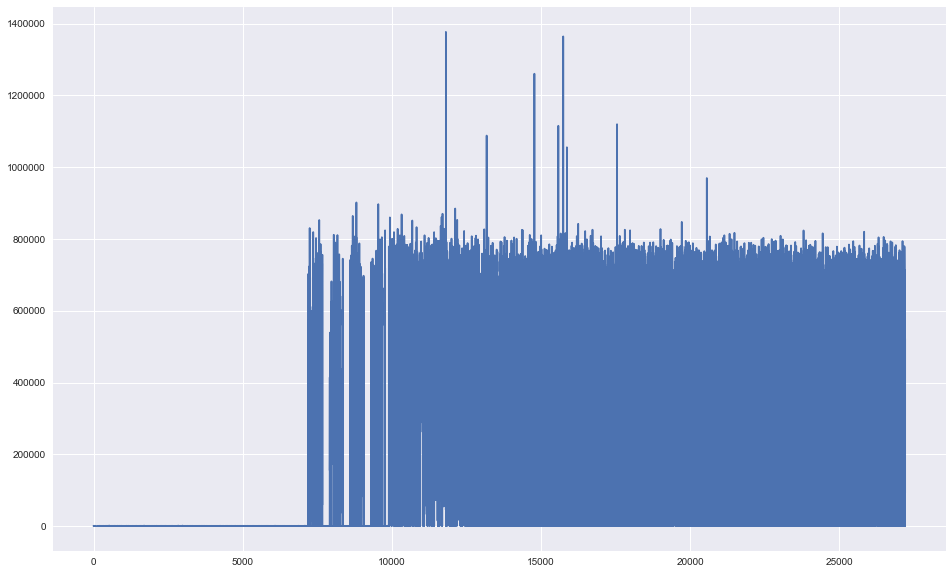

In [34]:
plt.figure(figsize=(16, 10))
plt.plot(tb_22_clear.loc[:, 'FILTERTIP'])
plt.show()

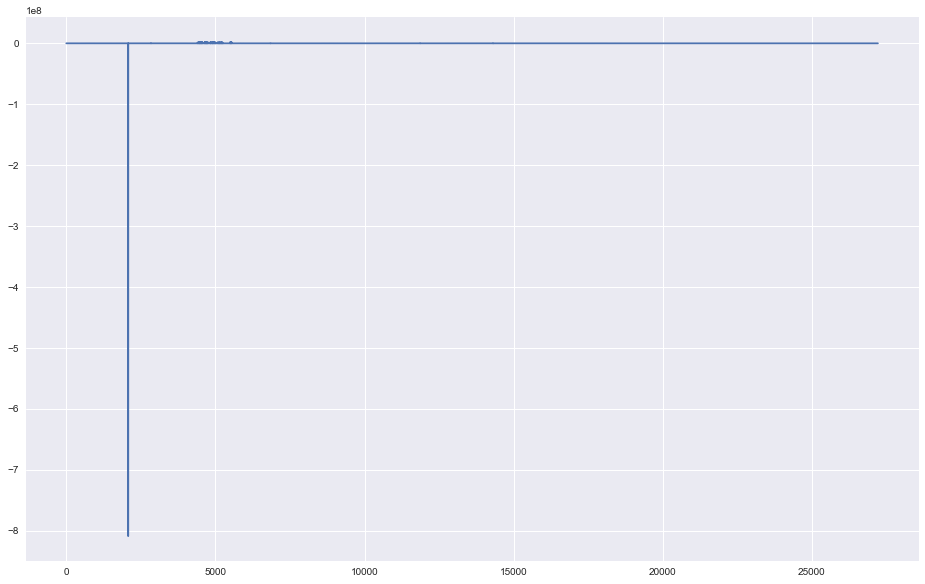

In [35]:
plt.figure(figsize=(16, 10))
plt.plot(tb_22_new.loc[:, 'TOTALWASTE'])
plt.show()

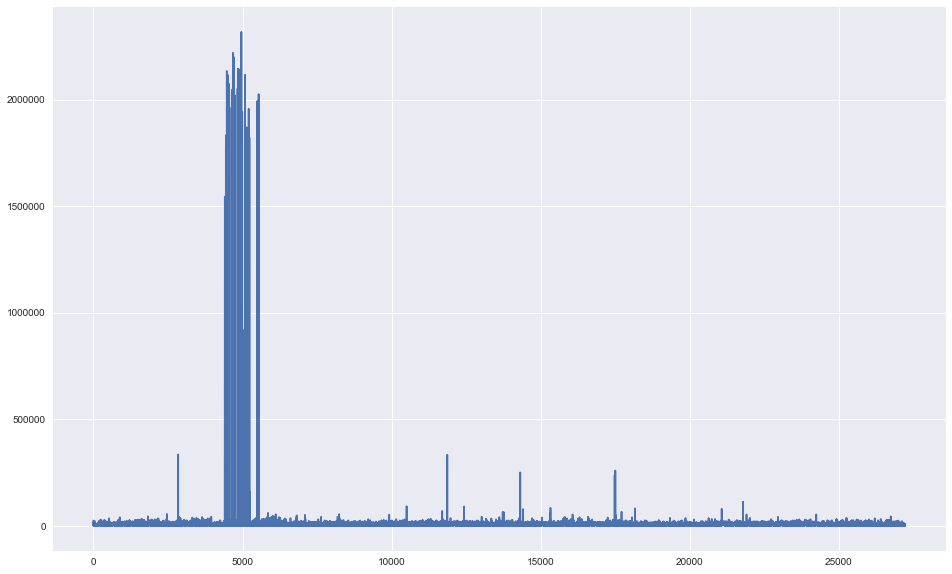

In [36]:
plt.figure(figsize=(16, 10))
plt.plot(tb_22_clear.loc[:, 'TOTALWASTE'])
plt.show()

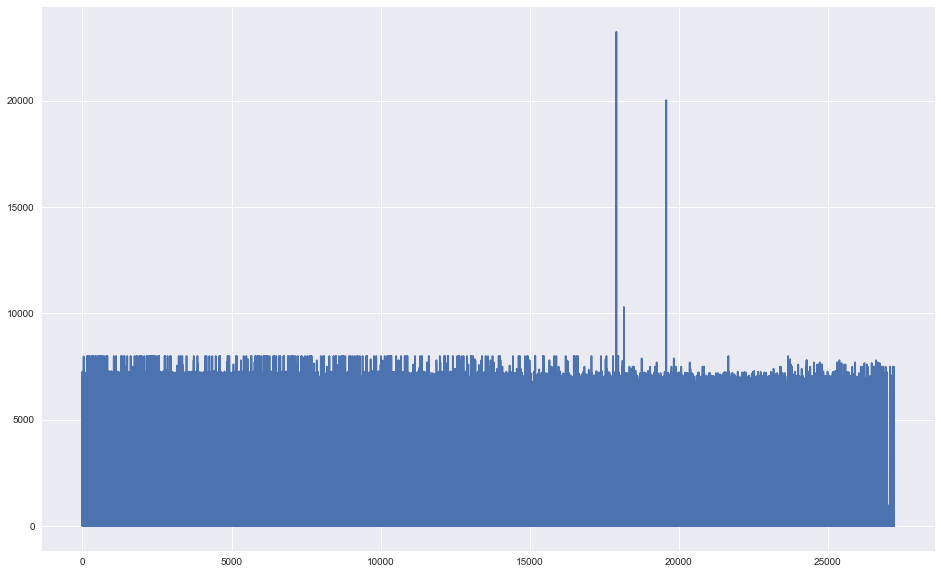

In [37]:
plt.figure(figsize=(16, 10))
plt.plot(tb_22_new.loc[:, 'MACHINESPEED'])
plt.show()

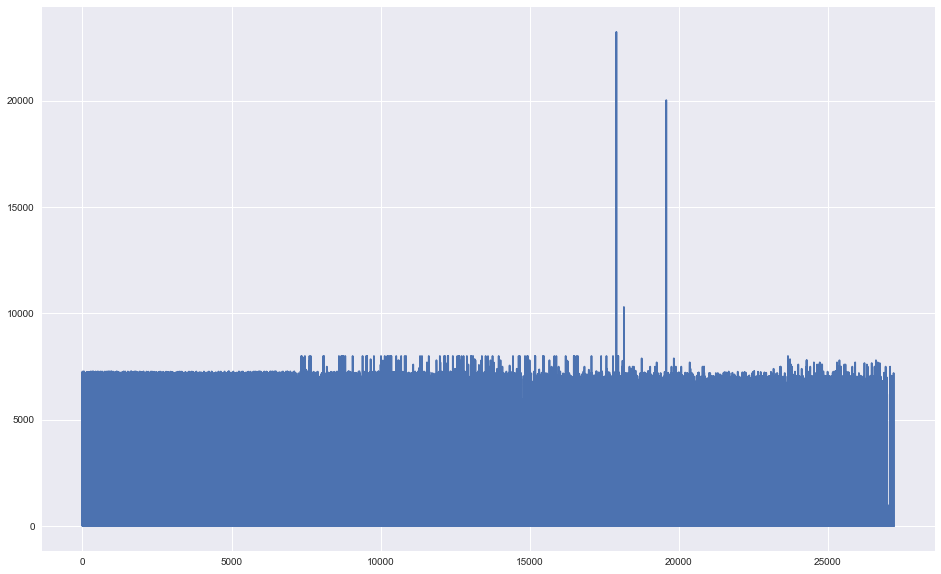

In [38]:
plt.figure(figsize=(16, 10))
plt.plot(tb_22_clear.loc[:, 'MACHINESPEED'])
plt.show()

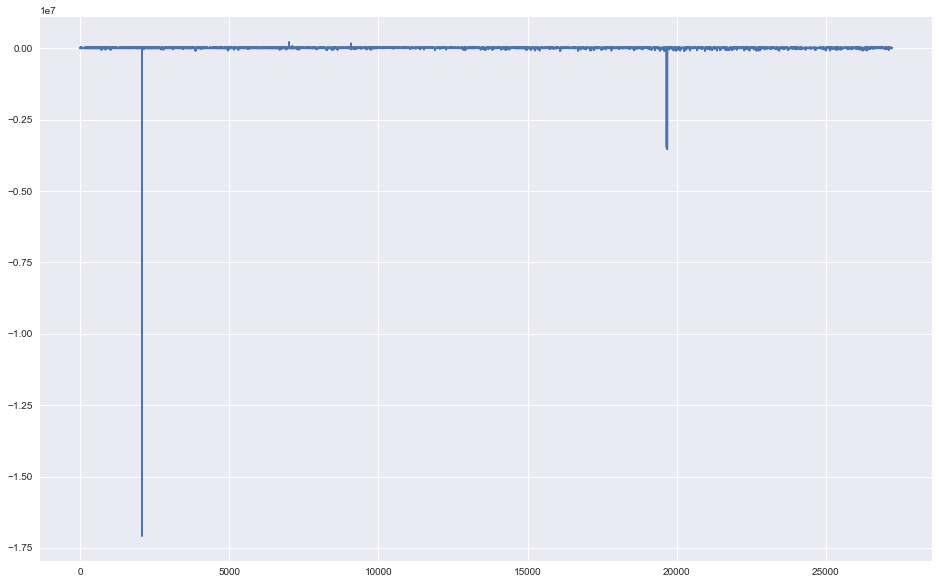

In [39]:
plt.figure(figsize=(16, 10))
plt.plot(tb_22_new.loc[:, 'RUNTIME'])
plt.show()

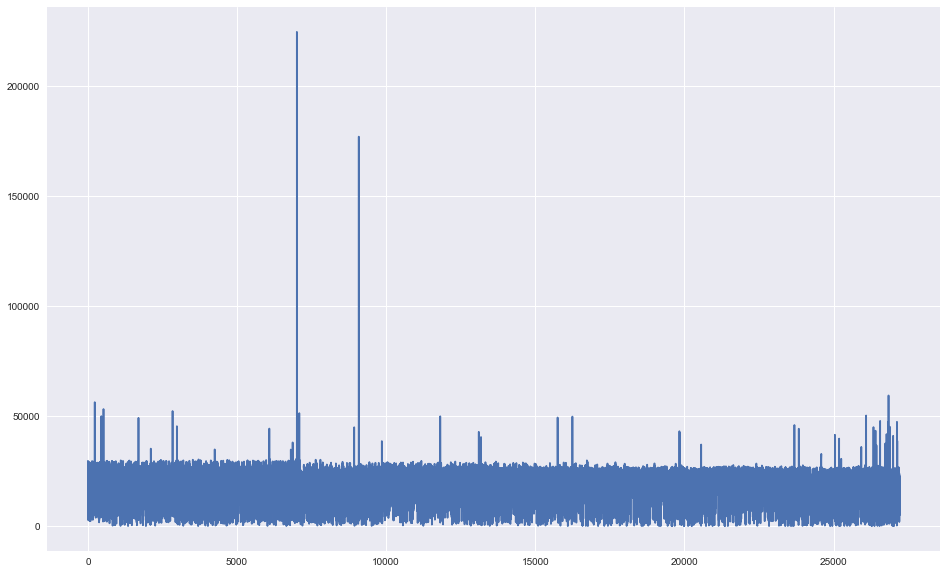

In [40]:
plt.figure(figsize=(16, 10))
plt.plot(tb_22_clear.loc[:, 'RUNTIME'])
plt.show()

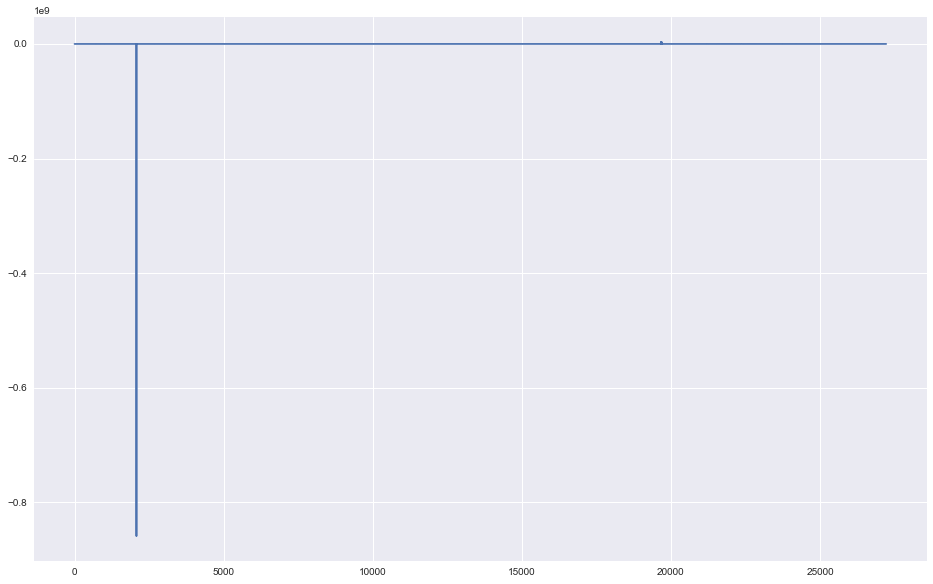

In [41]:
plt.figure(figsize=(16, 10))
plt.plot(tb_22_new.loc[:, 'TOTALSTOPTIME'])
plt.show()

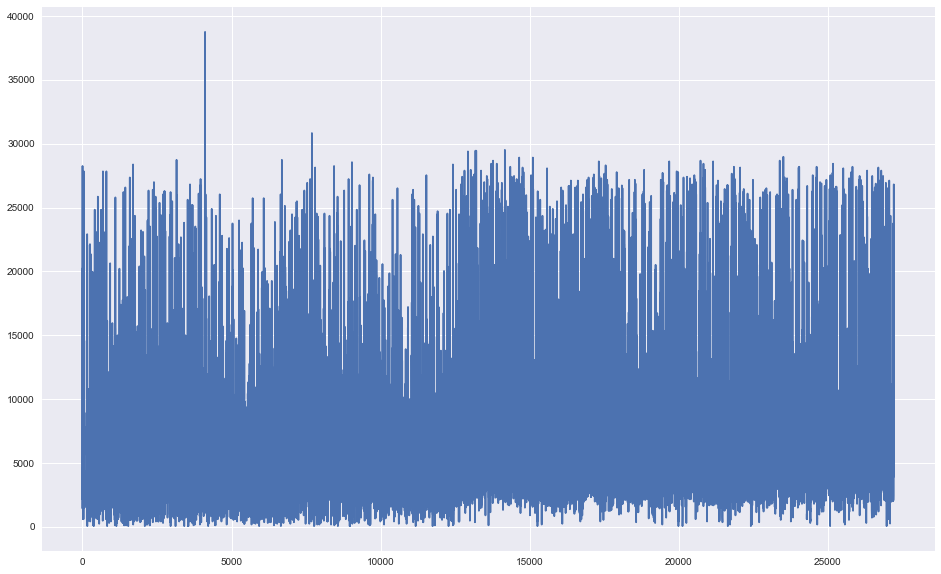

In [42]:
plt.figure(figsize=(16, 10))
plt.plot(tb_22_clear.loc[:, 'TOTALSTOPTIME'])
plt.show()

## 表46、47

In [43]:
tb_46_new = tb_46[['MACH_ID', 'TEST_ID', 'WEIGHT_VALUE', 'CIRCLE_VALUE', 'LENGTH_VALUE', 'PD_VALUE']]
tb_46_new.head()

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE
0,test1,2015-10-28 09:16:45OM-VA,0.528,17.045092,97.210899,1.793685
1,test1,2015-10-28 09:16:45OM-VA,0.543,17.025764,97.003197,1.808758
2,test1,2015-10-28 09:16:45OM-VA,0.540,16.983648,96.938400,1.862607
3,test1,2015-10-28 09:16:45OM-VA,0.517,16.937761,96.846497,1.824378
4,test1,2015-10-28 09:26:22OM-VA,0.571,16.995275,97.066200,1.940983


In [44]:
tb_47_new = tb_47[['MACH_ID', 'TEST_ID', 'SAMPLE_NAME']]
tb_47_new.head()

,MACH_ID,TEST_ID,SAMPLE_NAME
0,test5,2015-09-30 08:23:12,利群（新版）
1,test5,2015-09-30 08:36:33,利群（新版）
2,test5,2015-10-05 18:11:39,利群（新版）
3,test5,2015-10-05 18:28:22,真龙（珍品）
4,test5,2015-10-05 19:24:29,利群（新版）


In [45]:
tb_46_new.describe()

,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE
count,1.778490e+06,1.778490e+06,1.778490e+06,1.778490e+06
mean,8.250566e+01,1.165480e+02,1.172544e+02,1.062808e+02
std,8.997589e+02,9.563260e+02,5.660304e+02,1.024406e+03
min,-2.630000e-01,-1.183101e+01,0.000000e+00,-1.382426e+04
25%,8.660000e-01,2.445243e+01,8.389790e+01,1.062865e+00
50%,8.890000e-01,2.449948e+01,8.402699e+01,1.114208e+00
75%,9.080000e-01,2.454295e+01,8.417740e+01,1.175851e+00
max,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03


In [46]:
droped = tb_46_new[(tb_46_new['WEIGHT_VALUE'] <= 0) | (tb_46_new['CIRCLE_VALUE'] <= 0) | 
                   (tb_46_new['LENGTH_VALUE'] <= 0) | (tb_46_new['PD_VALUE'] <= 0) | 
                  (tb_46_new['WEIGHT_VALUE'] > 10) | (tb_46_new['CIRCLE_VALUE'] > 100) | 
                   (tb_46_new['LENGTH_VALUE'] > 100) | (tb_46_new['PD_VALUE'] > 10)]

In [47]:
tb_46_clear = tb_46_new.append(droped).drop_duplicates(keep=False)
tb_46_clear.head()

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE
0,test1,2015-10-28 09:16:45OM-VA,0.528,17.045092,97.210899,1.793685
1,test1,2015-10-28 09:16:45OM-VA,0.543,17.025764,97.003197,1.808758
2,test1,2015-10-28 09:16:45OM-VA,0.540,16.983648,96.938400,1.862607
3,test1,2015-10-28 09:16:45OM-VA,0.517,16.937761,96.846497,1.824378
4,test1,2015-10-28 09:26:22OM-VA,0.571,16.995275,97.066200,1.940983


In [48]:
tb_46_clear.describe()

,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE
count,1.758586e+06,1.758586e+06,1.758586e+06,1.758586e+06
mean,8.679906e-01,2.401078e+01,8.486033e+01,1.149287e+00
std,9.384089e-02,1.890823e+00,3.191901e+00,1.966377e-01
min,1.590000e-01,9.250043e-01,6.266360e+01,1.431033e-04
25%,8.660000e-01,2.445192e+01,8.389820e+01,1.062350e+00
50%,8.890000e-01,2.449871e+01,8.402690e+01,1.113208e+00
75%,9.070000e-01,2.454149e+01,8.417621e+01,1.173314e+00
max,2.220000e+00,6.561050e+01,9.999297e+01,3.815260e+00


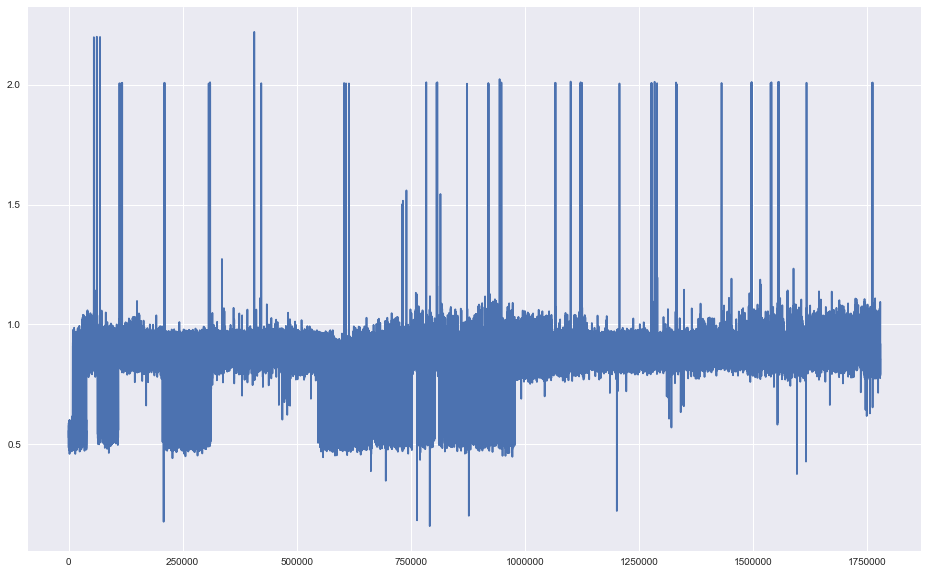

In [49]:
plt.figure(figsize=(16, 10))
plt.plot(tb_46_clear['WEIGHT_VALUE'])
plt.show()

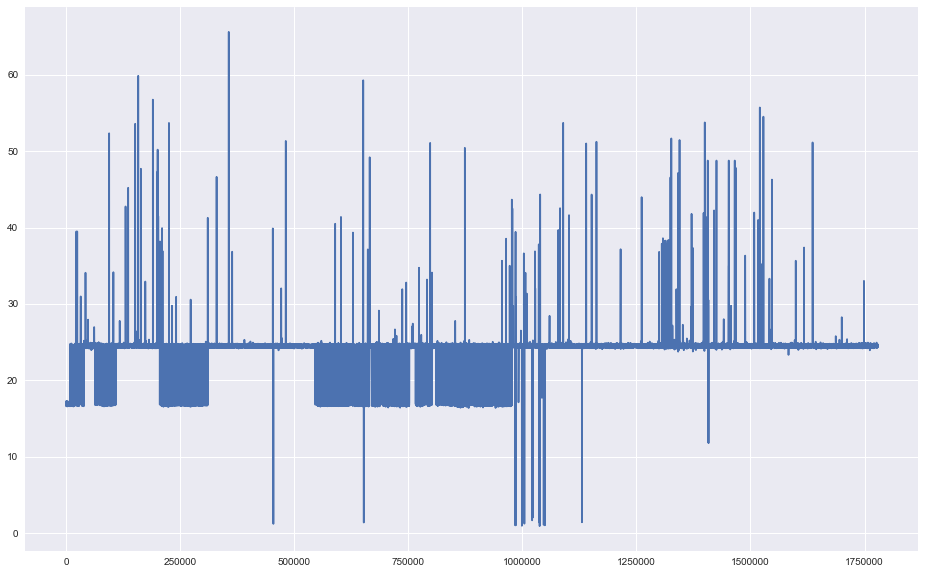

In [50]:
plt.figure(figsize=(16, 10))
plt.plot(tb_46_clear['CIRCLE_VALUE'])
plt.show()

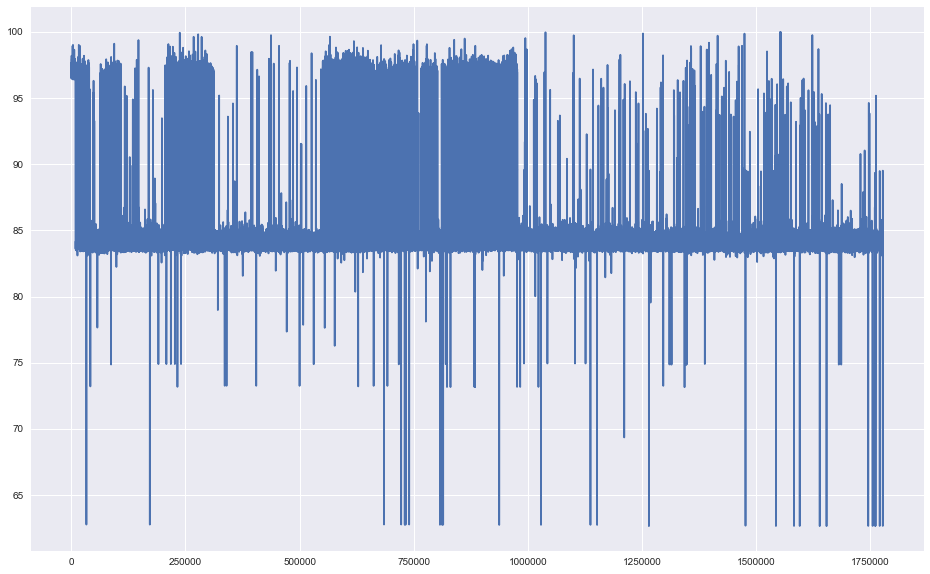

In [51]:
plt.figure(figsize=(16, 10))
plt.plot(tb_46_clear['LENGTH_VALUE'])
plt.show()

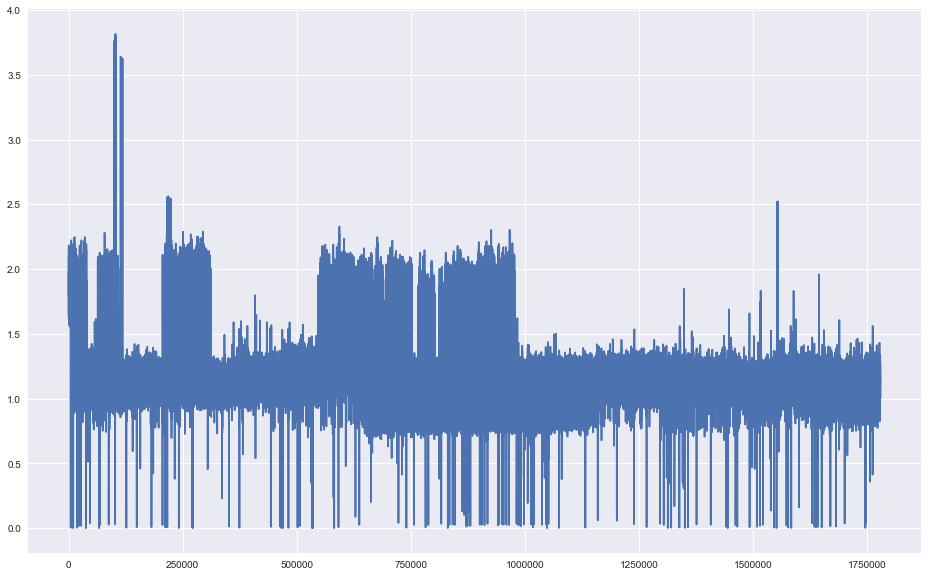

In [52]:
plt.figure(figsize=(16, 10))
plt.plot(tb_46_clear['PD_VALUE'])
plt.show()